In [1]:
from note_reader import get_notes_as_pitch_classes
from wv_utils import create_angle_matrix
from gensim.models import FastText
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob

In [2]:
plt.rcParams["font.family"] = ["Times"]
UNK_TAG = "<UNK>"
file_list = glob.glob("data/txt/*.txt")

In [3]:
docs, counts = get_notes_as_pitch_classes(file_list, makam="ussak")

In [4]:
counts.most_common()

[('D', 8494),
 ('C', 7868),
 ('A', 7225),
 ('A#8', 7126),
 ('E', 5200),
 ('G', 3925),
 ('F', 2209),
 ('F#4', 941),
 ('D#5', 216),
 ('A#5', 121),
 ('C#4', 113),
 ('A#4', 92),
 ('D#4', 43),
 ('B', 31),
 ('D#8', 12),
 ('C#5', 12),
 ('F#1', 6),
 ('G#4', 6),
 ('G#5', 6),
 ('F#5', 5),
 ('C#8', 3),
 ('G#8', 1)]

In [5]:
ft_model = FastText(sentences=docs, vector_size=8,
                    epochs=250, window=5, seed=42)
wv = ft_model.wv
wv.most_similar(positive=["A", "D"], negative=["G"])  # C

[('C', 0.9040086269378662),
 ('A#8', 0.7689195275306702),
 ('E', 0.025078097358345985),
 ('C#5', -0.0822879746556282),
 ('A#5', -0.10146621614694595),
 ('C#4', -0.130735382437706),
 ('B', -0.1526823788881302),
 ('F', -0.15483805537223816),
 ('D#4', -0.21862904727458954),
 ('D#8', -0.2353317141532898)]

In [6]:
angles_dict = create_angle_matrix(wv)
df_ussak = pd.DataFrame.from_dict(angles_dict)
df_ussak.to_excel("results/angles_ussak.xlsx")

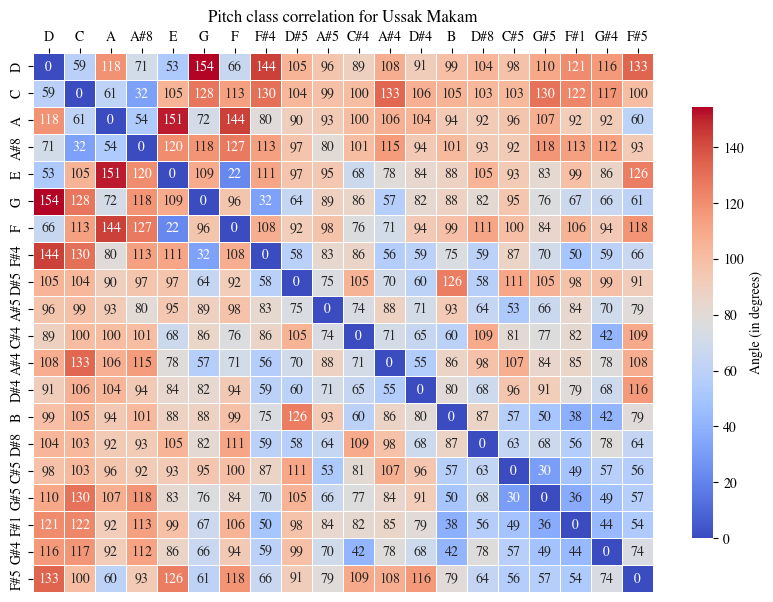

In [7]:
fig, ax = plt.subplots(figsize=(10, 7))
hm = sns.heatmap(df_ussak, cmap="coolwarm", annot=True,
                 fmt=",.0f", linewidths=0.5, cbar_kws={"shrink": 0.8})
hm.set(title="Pitch class correlation for Ussak Makam")
ax.collections[0].colorbar.set_label("Angle (in degrees)")
ax.xaxis.tick_top()
plt.show()
fig.savefig("results/ussak_corr.pdf")